## Imports

In [8]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
from scipy.stats import uniform, truncnorm, randint, loguniform
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate, RepeatedStratifiedKFold, PredefinedSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from xgboost import plot_importance
import shap

import pickle
import warnings

warnings.filterwarnings('ignore')

## Load Dataset

In [10]:
# Load dataset into a dataframe
motors_df = pd.read_csv("C:/Users/Casey/Downloads/HR_capstone_dataset.csv")


# Display first few rows of the dataframe
motors_df.head()

satisfaction_level  last_performance_rating  number_of_projects  \
0                0.38                     0.53                   2   
1                0.80                     0.86                   5   
2                0.11                     0.88                   7   
3                0.72                     0.87                   5   
4                0.37                     0.52                   2   

   avg_monthly_hours  years_at_company  had_work_accident  has_left_company  \
0                157                 3                  0                 1   
1                262                 6                  0                 1   
2                272                 4                  0                 1   
3                223                 5                  0                 1   
4                159                 3                  0                 1   

   promoted_in_last_5_years Department salary_level  
0                         0      sales          low  
1                         0      sales       medium  
2                         0      sales       medium  
3                         0      sales          low  
4                         0      sales          low

## Data Wrangling 

In [17]:
#gather a concise summary of a DataFrame
motors_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   satisfaction_level        14999 non-null  float64
 1   last_performance_rating   14999 non-null  float64
 2   number_of_projects        14999 non-null  int64  
 3   avg_monthly_hours         14999 non-null  int64  
 4   years_at_company          14999 non-null  int64  
 5   had_work_accident         14999 non-null  int64  
 6   has_left_company          14999 non-null  int64  
 7   promoted_in_last_5_years  14999 non-null  int64  
 8   Department                14999 non-null  object 
 9   salary_level              14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Data does not include missing values 

#### Missing Values

In [22]:
motors_df.isna().sum()

satisfaction_level          0
last_performance_rating     0
number_of_projects          0
avg_monthly_hours           0
years_at_company            0
had_work_accident           0
has_left_company            0
promoted_in_last_5_years    0
Department                  0
salary_level                0
dtype: int64

#### Exploring columns

In [42]:
# Display all column names
motors_df.columns

Index(['satisfaction_level', 'last_performance_rating', 'number_of_projects',
       'avg_monthly_hours', 'years_at_company', 'had_work_accident',
       'has_left_company', 'promoted_in_last_5_years', 'Department',
       'salary_level'],
      dtype='object')

In [44]:
# Rename columns to lowercase using a list comprehension
motors_df.columns = [col.lower() for col in motors_df.columns]

# Fix the typo in the column name
motors_df = motors_df.rename(columns={'average_montly_hours':'average_monthly_hours'})

# Display all column names after the update
print(motors_df.columns)

Index(['satisfaction_level', 'last_performance_rating', 'number_of_projects',
       'avg_monthly_hours', 'years_at_company', 'had_work_accident',
       'has_left_company', 'promoted_in_last_5_years', 'department',
       'salary_level'],
      dtype='object')


#### Descriptive Statistics about the Data

In [82]:
motors_df.describe().T

count        mean        std    min     25%  \
satisfaction_level        14999.0    0.612834   0.248631   0.09    0.44   
last_performance_rating   14999.0    0.716102   0.171169   0.36    0.56   
number_of_projects        14999.0    3.803054   1.232592   2.00    3.00   
avg_monthly_hours         14999.0  201.050337  49.943099  96.00  156.00   
years_at_company          14999.0    3.498233   1.460136   2.00    3.00   
had_work_accident         14999.0    0.144610   0.351719   0.00    0.00   
has_left_company          14999.0    0.238083   0.425924   0.00    0.00   
promoted_in_last_5_years  14999.0    0.021268   0.144281   0.00    0.00   

                             50%     75%    max  
satisfaction_level          0.64    0.82    1.0  
last_performance_rating     0.72    0.87    1.0  
number_of_projects          4.00    5.00    7.0  
avg_monthly_hours         200.00  245.00  310.0  
years_at_company            3.00    4.00   10.0  
had_work_accident           0.00    0.00    1.0  
has_left_company            0.00    0.00    1.0  
promoted_in_last_5_years    0.00    0.00    1.0

#### Duplicate Values

In [46]:
# Count the number of duplicate rows in the DataFrame
duplicate_values = motors_df.duplicated().sum()

# Calculate the percentage of duplicate rows
duplicate_percentage = round(100 * duplicate_values / motors_df.shape[0], 2)

#print the result
print(f'There are {duplicate_values} duplicates, which is {duplicate_percentage}% of the rows')

There are 3008 duplicates, which is 20.05% of the rows


In [54]:
# Identify rows that are duplicates
duplicate_rows = motors_df[motors_df.duplicated(keep=False)]

# Inspect the first 3 duplicate rows
duplicate_rows.head(3)

satisfaction_level  last_performance_rating  number_of_projects  \
0                0.38                     0.53                   2   
1                0.80                     0.86                   5   
2                0.11                     0.88                   7   

   avg_monthly_hours  years_at_company  had_work_accident  has_left_company  \
0                157                 3                  0                 1   
1                262                 6                  0                 1   
2                272                 4                  0                 1   

   promoted_in_last_5_years department salary_level  
0                         0      sales          low  
1                         0      sales       medium  
2                         0      sales       medium

In [50]:
# Drop duplicates and save the dataframe in a new variable
no_dupes = motors_df.drop_duplicates()

# Display the number of rows for the dataframe with no duplicates vs the original dataframe
print(f'Original dataframe had {motors_df.shape[0]} rows')
print(f'New dataframe with no duplicates has {no_dupes.shape[0]} rows')

Original dataframe had 14999 rows
New dataframe with no duplicates has 11991 rows


## Data Exploratory Analysis (EDA)

#### Outliners in DataFrame

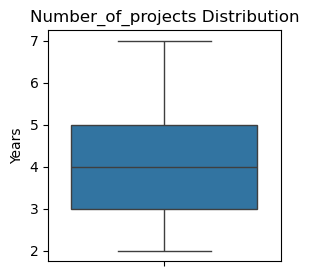

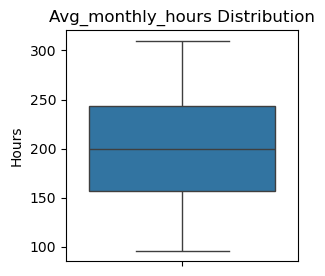

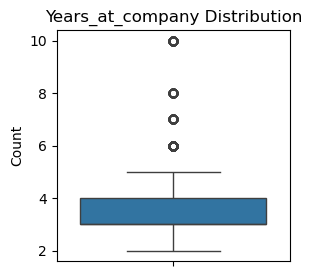

In [64]:
# Create a list of discrete columns to visualize
discrete_cols = ['number_of_projects', 'avg_monthly_hours', 'years_at_company']

# Loop through each discrete column and create a boxplot
for col in discrete_cols:
    plt.figure(figsize=(3, 3))
    sns.boxplot(data=no_dupes[col])
    plt.title(f'{col.capitalize()} Distribution')  # Capitalize the column name for better readability
    plt.ylabel('Years' if col == 'number_of_projects' else 'Hours' if col == 'avg_monthly_hours' else 'Count')  # Adjust the y-axis label based on the column
    plt.show()

'Years_at_company' has the outliers which is acceptable as people might have stayed longer based on their interaction with internal culture 

#### Visualizing Target Variable ("has_left_company")

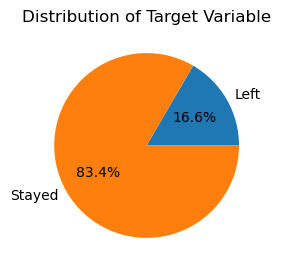

In [76]:
# numbers of people who left vs. stayed
employees_left = no_dupes['has_left_company'].sum()

# plot the distribution of the target variable as a pie chart
plt.figure(figsize=(4, 3))
plt.pie([employees_left, no_dupes.shape[0] - employees_left], labels=['Left', 'Stayed'], autopct='%1.1f%%')
plt.title('Distribution of Target Variable')
plt.show()

The target variable is imbalanced

#### Visualizing relationship between Discrete Numeric Columns

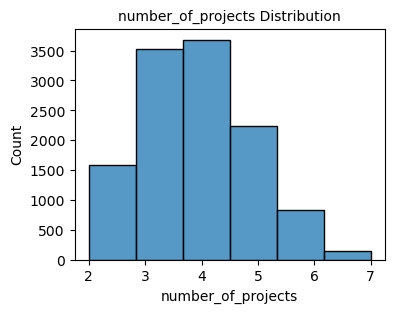

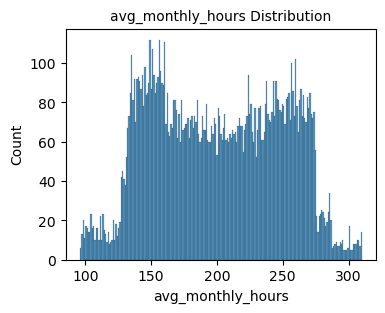

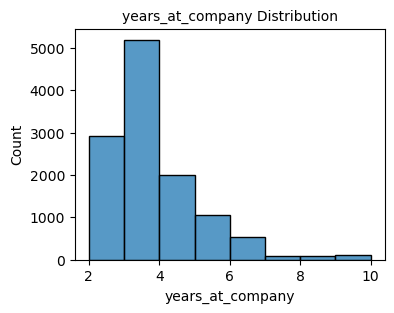

In [92]:
# Create histograms to visualize the distribution of discrete numeric columns
for col in discrete_cols:
    plt.figure(figsize=(4, 3))
    sns.histplot(data=no_dupes[col], bins=no_dupes[col].nunique(), kde=False)
    plt.title(f'{col} Distribution', fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Number of Projects: The distribution of the number of projects appears to be fairly normal, with no obvious skewness or outliers. This suggests that the number of projects is relatively evenly distributed across the dataset.

Average Monthly Hours: The distribution of average monthly hours is not normal, exhibiting a saddle shape between 150 and 270 hours. There are no outliers in this variable, as previously explored in the boxplots. 

Time Spend at Company: The distribution of time spent at the company is right-skewed, indicating that most employees have spent less than 6 years at the company. 

#### Visualizing relationship between categorical columns

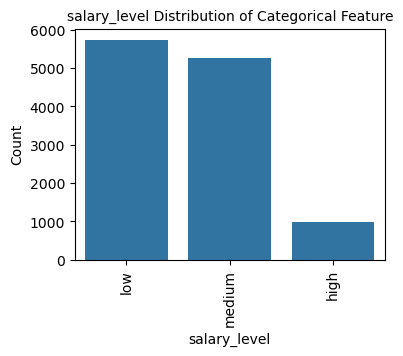

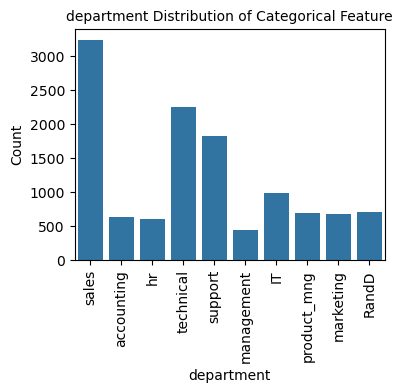

In [103]:
# Visualize the distribution of categorical features
categorical_cols = ['salary_level', 'department']
for col in categorical_cols:
    plt.figure(figsize=(4, 3))
    sns.countplot(data=no_dupes, x=col)
    plt.title(f'{col} Distribution of Categorical Feature', fontsize=10)
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Count')
    plt.show()

Salary: The distribution of salaries is right-skewed, which is not surprising given that companies often have income distributions that are imbalanced 
towards the top, where there are fewer roles.

Department: The distribution of departments is non-uniform, with Sales, Technical, and Support departments being overrepresented compared to others.

#### Visualizing relationship between binary columns

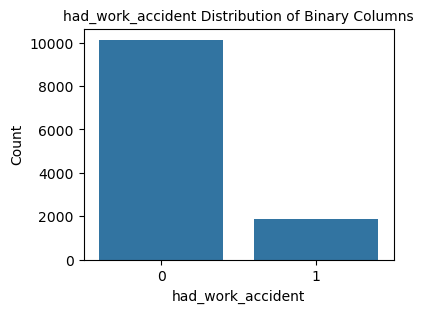

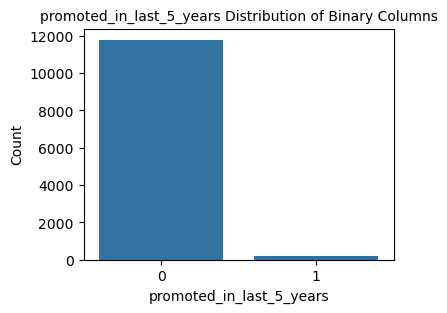

In [115]:
binary_cols = ['had_work_accident', 'promoted_in_last_5_years']

for col in binary_cols:
    plt.figure(figsize=(4, 3))
    val_counts = no_dupes[col].value_counts().reset_index()
    sns.barplot(data=val_counts, x=val_counts.columns[0], y=val_counts.columns[1])
    plt.title(f'{col} Distribution of Binary Columns', fontsize=10)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Work Accident: The distribution of Work Accident is severely imbalanced, which is not unexpected. It's reasonable to assume that employees who have 
experienced a work accident are more likely to leave the company. At first glance, this feature appears to be correct and potentially important in 
predicting employee turnover.

Promotion Last 5 Years: The distribution of Promotion Last 5 Years is even more severely imbalanced, which is surprising. This imbalance may indicate 
that promotions are relatively rare events, or that the data is biased towards employees who have not received promotions. Further investigation is
needed to understand the underlying reasons for this imbalance and to determine if it's a relevant feature for predicting employee turnover.

#### Visualizing relationship between continuous features

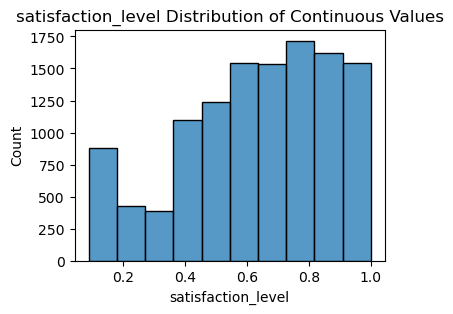

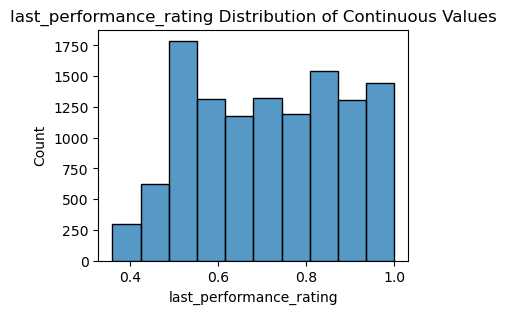

In [125]:
continuous_cols = ['satisfaction_level', 'last_performance_rating']

for col in continuous_cols:
    plt.figure(figsize=(4, 3))
    sns.histplot(data=no_dupes[col], bins=10)
    plt.title(f'{col} Distribution of Continuous Values')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

Satisfaction Level: The distribution of Satisfaction Level is skewed towards positive reviews, which is unexpected if there were significant issues 
within the company. A more normal or right-skewed distribution would be anticipated in such a scenario. This suggests that the correlation between Satisfaction Level and  other features, including the target variable, will be particularly interesting to explore. However, it's essential to consider the potential bias in  the data: if employees believed their survey responses could be traced back to them, they may not have provided honest ratings.

Last Evaluation: The distribution of Last Evaluation is non-normal, with a notable spike at 0.5. This could indicate that low evaluations may lead to employees feeling 
undervalued, which may contribute to turnover. Further analysis is needed to understand the relationship between Last Evaluation and employee turnover.

#### Pair Plots

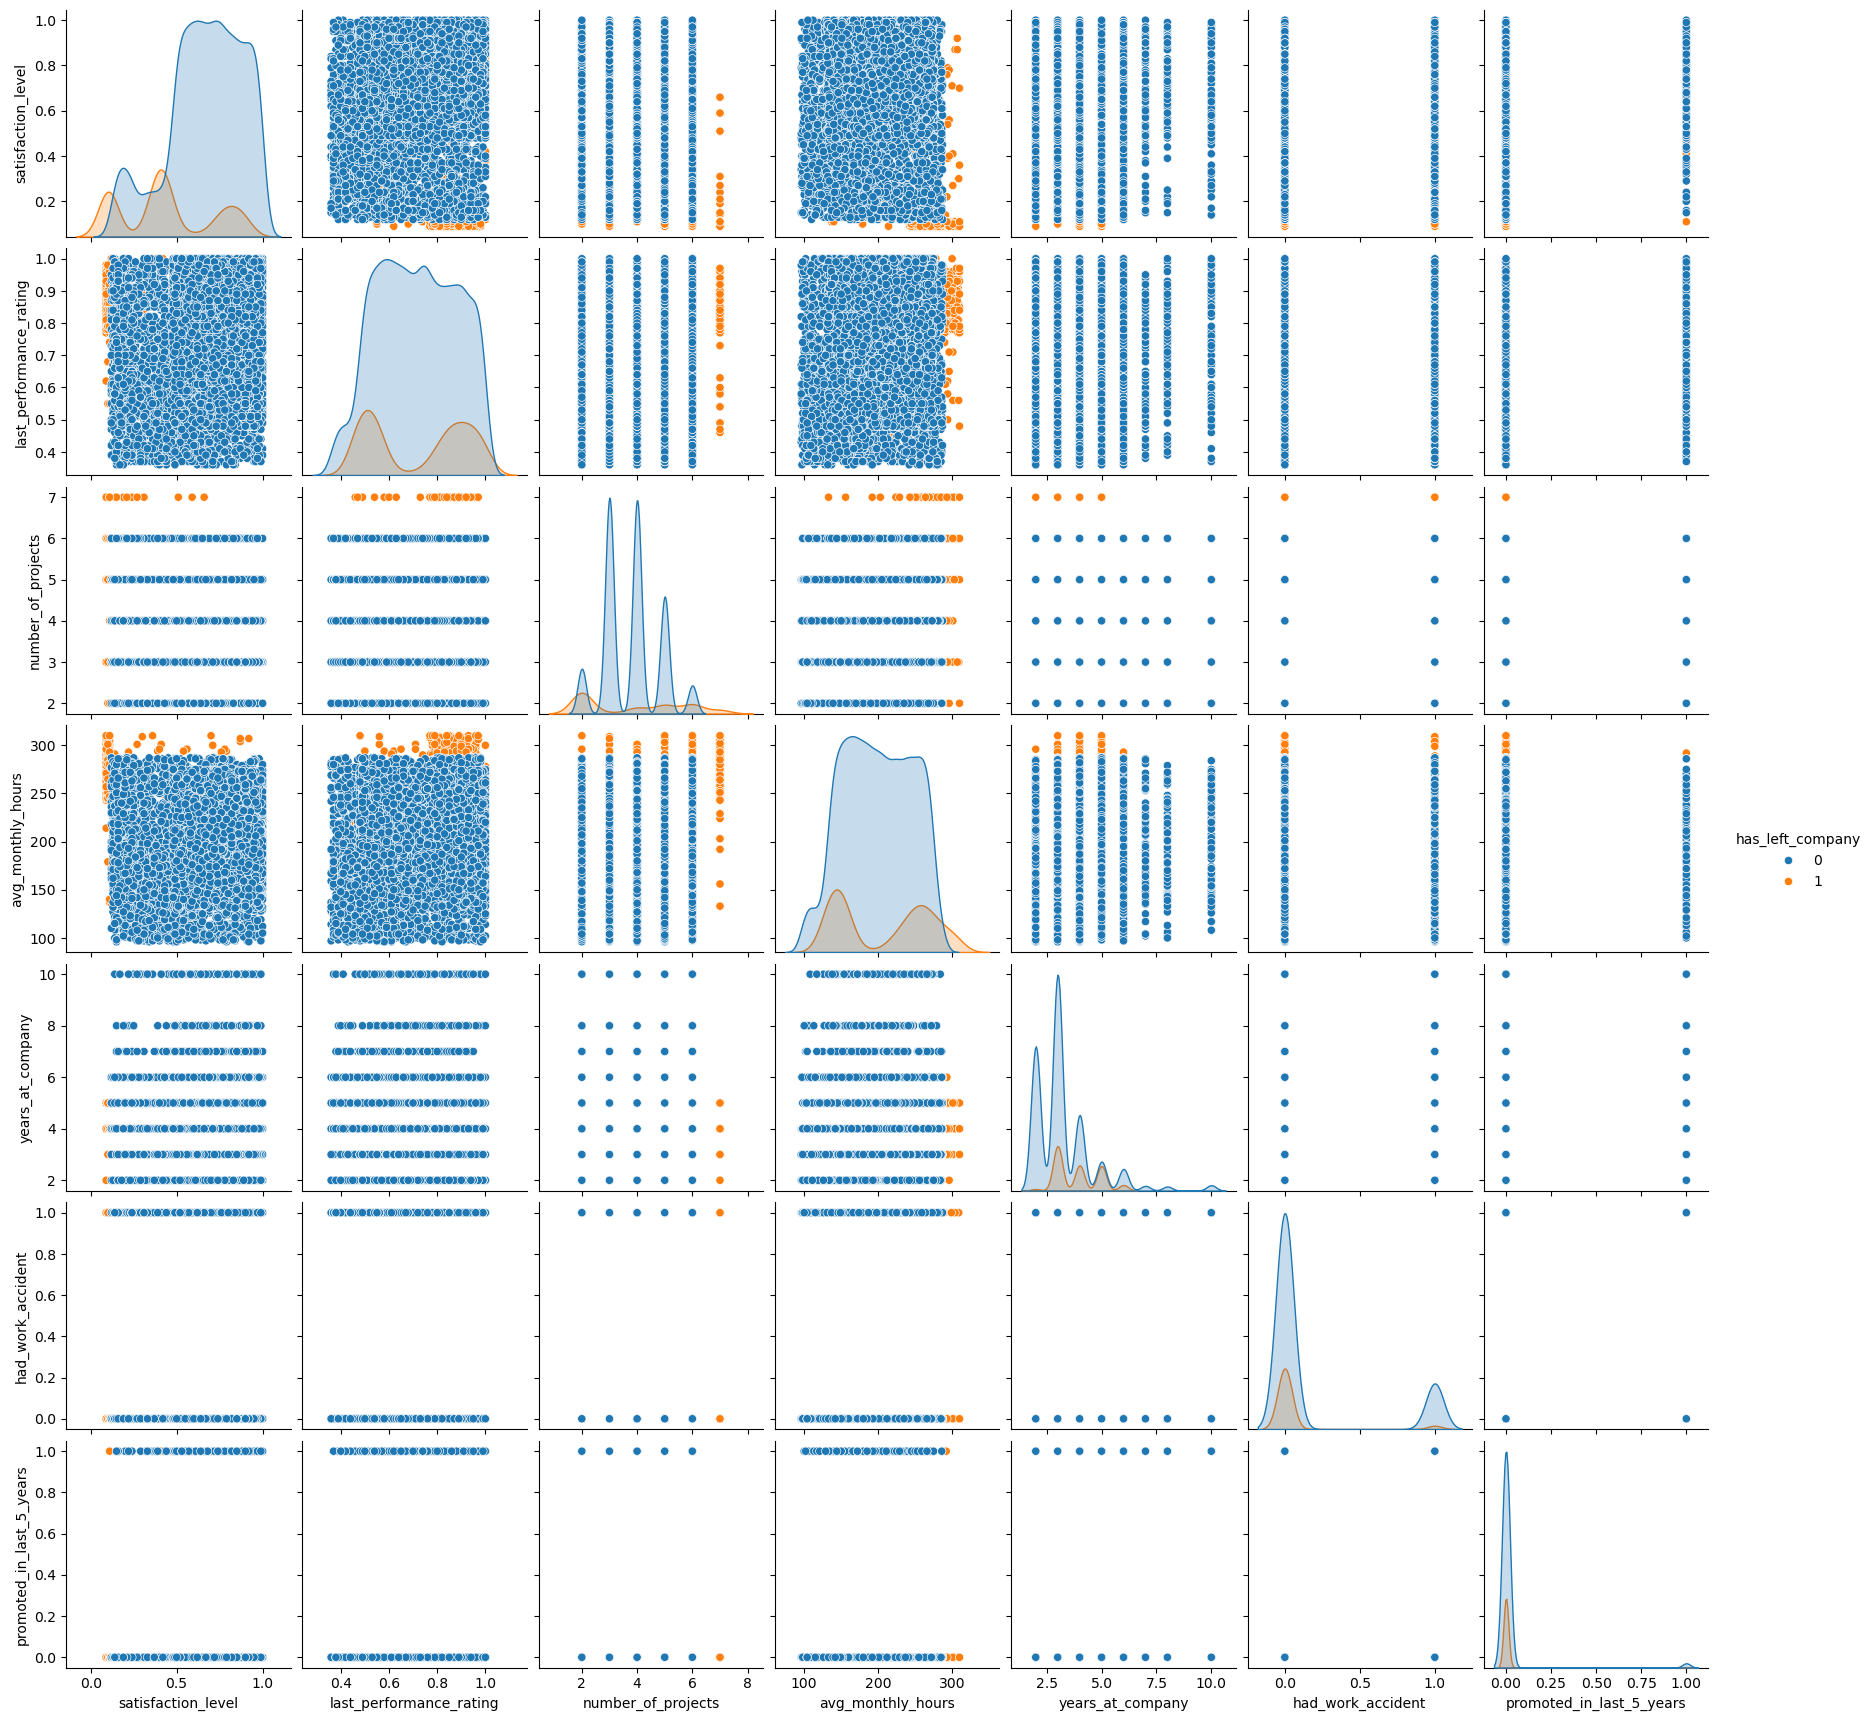

In [131]:
# Create a scatter plot looking at relationships between features
sns.pairplot(data=no_dupes, hue='has_left_company')
plt.show()

##### Preliminary Insights into Employee Turnover

Satisfaction Level: A low Satisfaction Level appears to be a strong indicator of an employee's likelihood to leave the company.

Number of Projects: A high Number of Projects seems to be associated with a higher tendency for employees to leave.

Average Monthly Hours: Similarly, a high Average Monthly Hours is linked to a greater likelihood of employee turnover.

Time Spend at the Company: Interestingly, employees who leave the company tend to have spent 5 or fewer years at the organization

#### Analysis of Employees who left based on satisfaction level and monthly hours

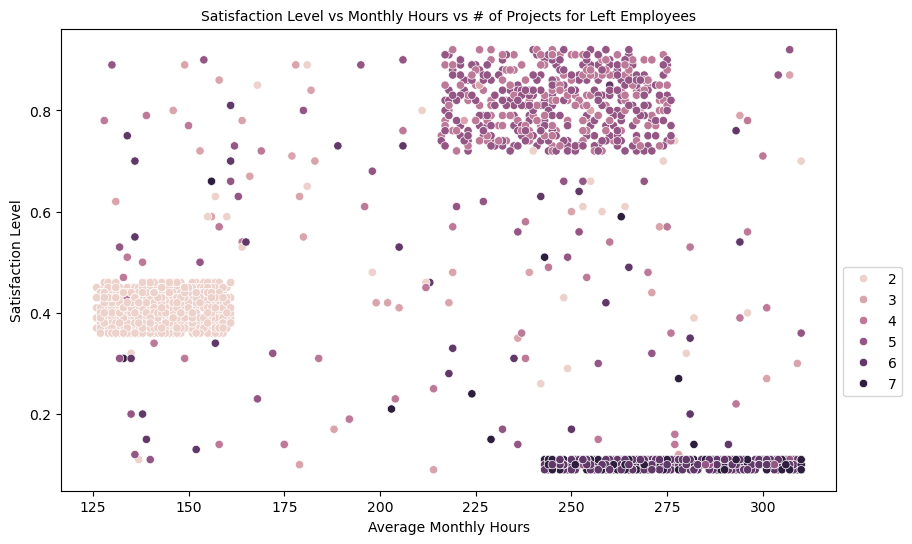

In [147]:
# Filter the dataset to only include employees who left the company
user_left = no_dupes[no_dupes['has_left_company'] == 1]

# Update the 'left' column to a more descriptive label
user_left['left'] = 'Employee Left'

# Create a scatter plot to visualize the relationship between satisfaction level, monthly hours, and number of projects
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_left, x='avg_monthly_hours', y='satisfaction_level', hue='number_of_projects')

# Customize the plot title and labels
plt.title('Satisfaction Level vs Monthly Hours vs # of Projects for Left Employees', fontsize=10)
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')

# Adjust the legend position
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Display the plot
plt.show()

* Low Satisfaction Group
    * Satisfaction Level: < 0.1
    * Average Monthly Hours: > 240
    * Number of Projects: High
  
This group is likely to leave the company, with extremely low satisfaction levels, high workloads, and a high number of projects.

* Mid Satisfaction Group
    * Satisfaction Level: 0.35 ≤ x ≤ 0.45
    * Average Monthly Hours: 125 ≤ x ≤ 165
    * Number of Projects: Low

Employees in this group tend to leave with moderate satisfaction levels, relatively low workloads, and a low number of projects.

* High Satisfaction Group
    * Satisfaction Level: > 0.7
    * Average Monthly Hours: 215 ≤ x ≤ 275
    * Number of Projects: Mid-to-High

Interestingly, even employees with high satisfaction levels tend to leave the company if they work long hours and have a mid-to-high number of projects.


#### Analysis of employee who stay

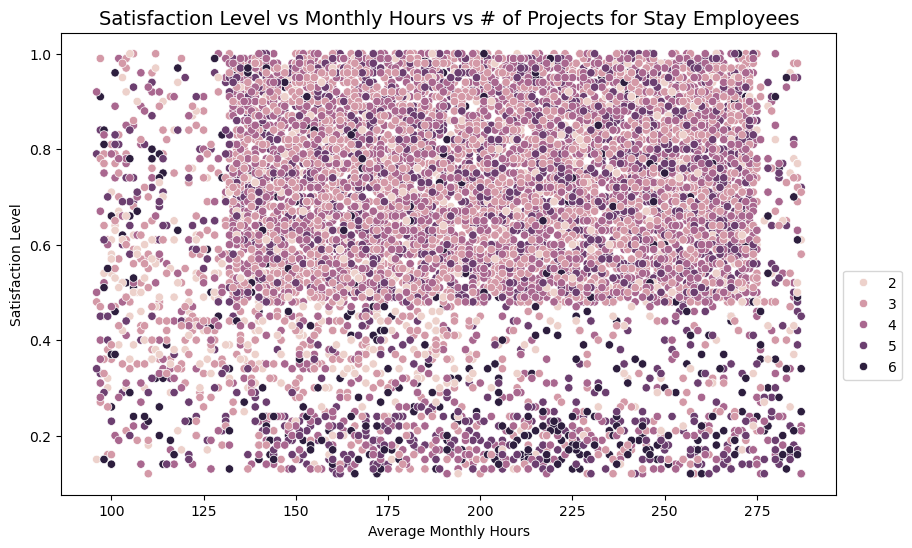

In [166]:
# Filter the dataset to only include employees who stayed with the company
user_stayed = no_dupes[no_dupes['has_left_company'] == 0]

# Update the 'left' column to a more descriptive label
user_stayed['left'] = 'Employee Stayed'

# Create a scatter plot to visualize the relationship between satisfaction level, monthly hours, and number of projects
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_stayed, x='avg_monthly_hours', y='satisfaction_level', hue='number_of_projects')

# Customize the plot title and labels
plt.title('Satisfaction Level vs Monthly Hours vs # of Projects for Stay Employees', fontsize=14)
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')

# Adjust the legend position
plt.legend(bbox_to_anchor=(1.0, 0.5))

# Display the plot
plt.show()

Notably, the scatter plot reveals a fairly even distribution of satisfaction levels, hours worked, and number of projects among employees who stayed 
with the company, particularly for those with fewer than 7 projects. This suggests that, within this range, there is no strong correlation between 
these factors and employee retention.

#### Analysis of employees who left the company but where highly statisfied and where working mid-to-high hours

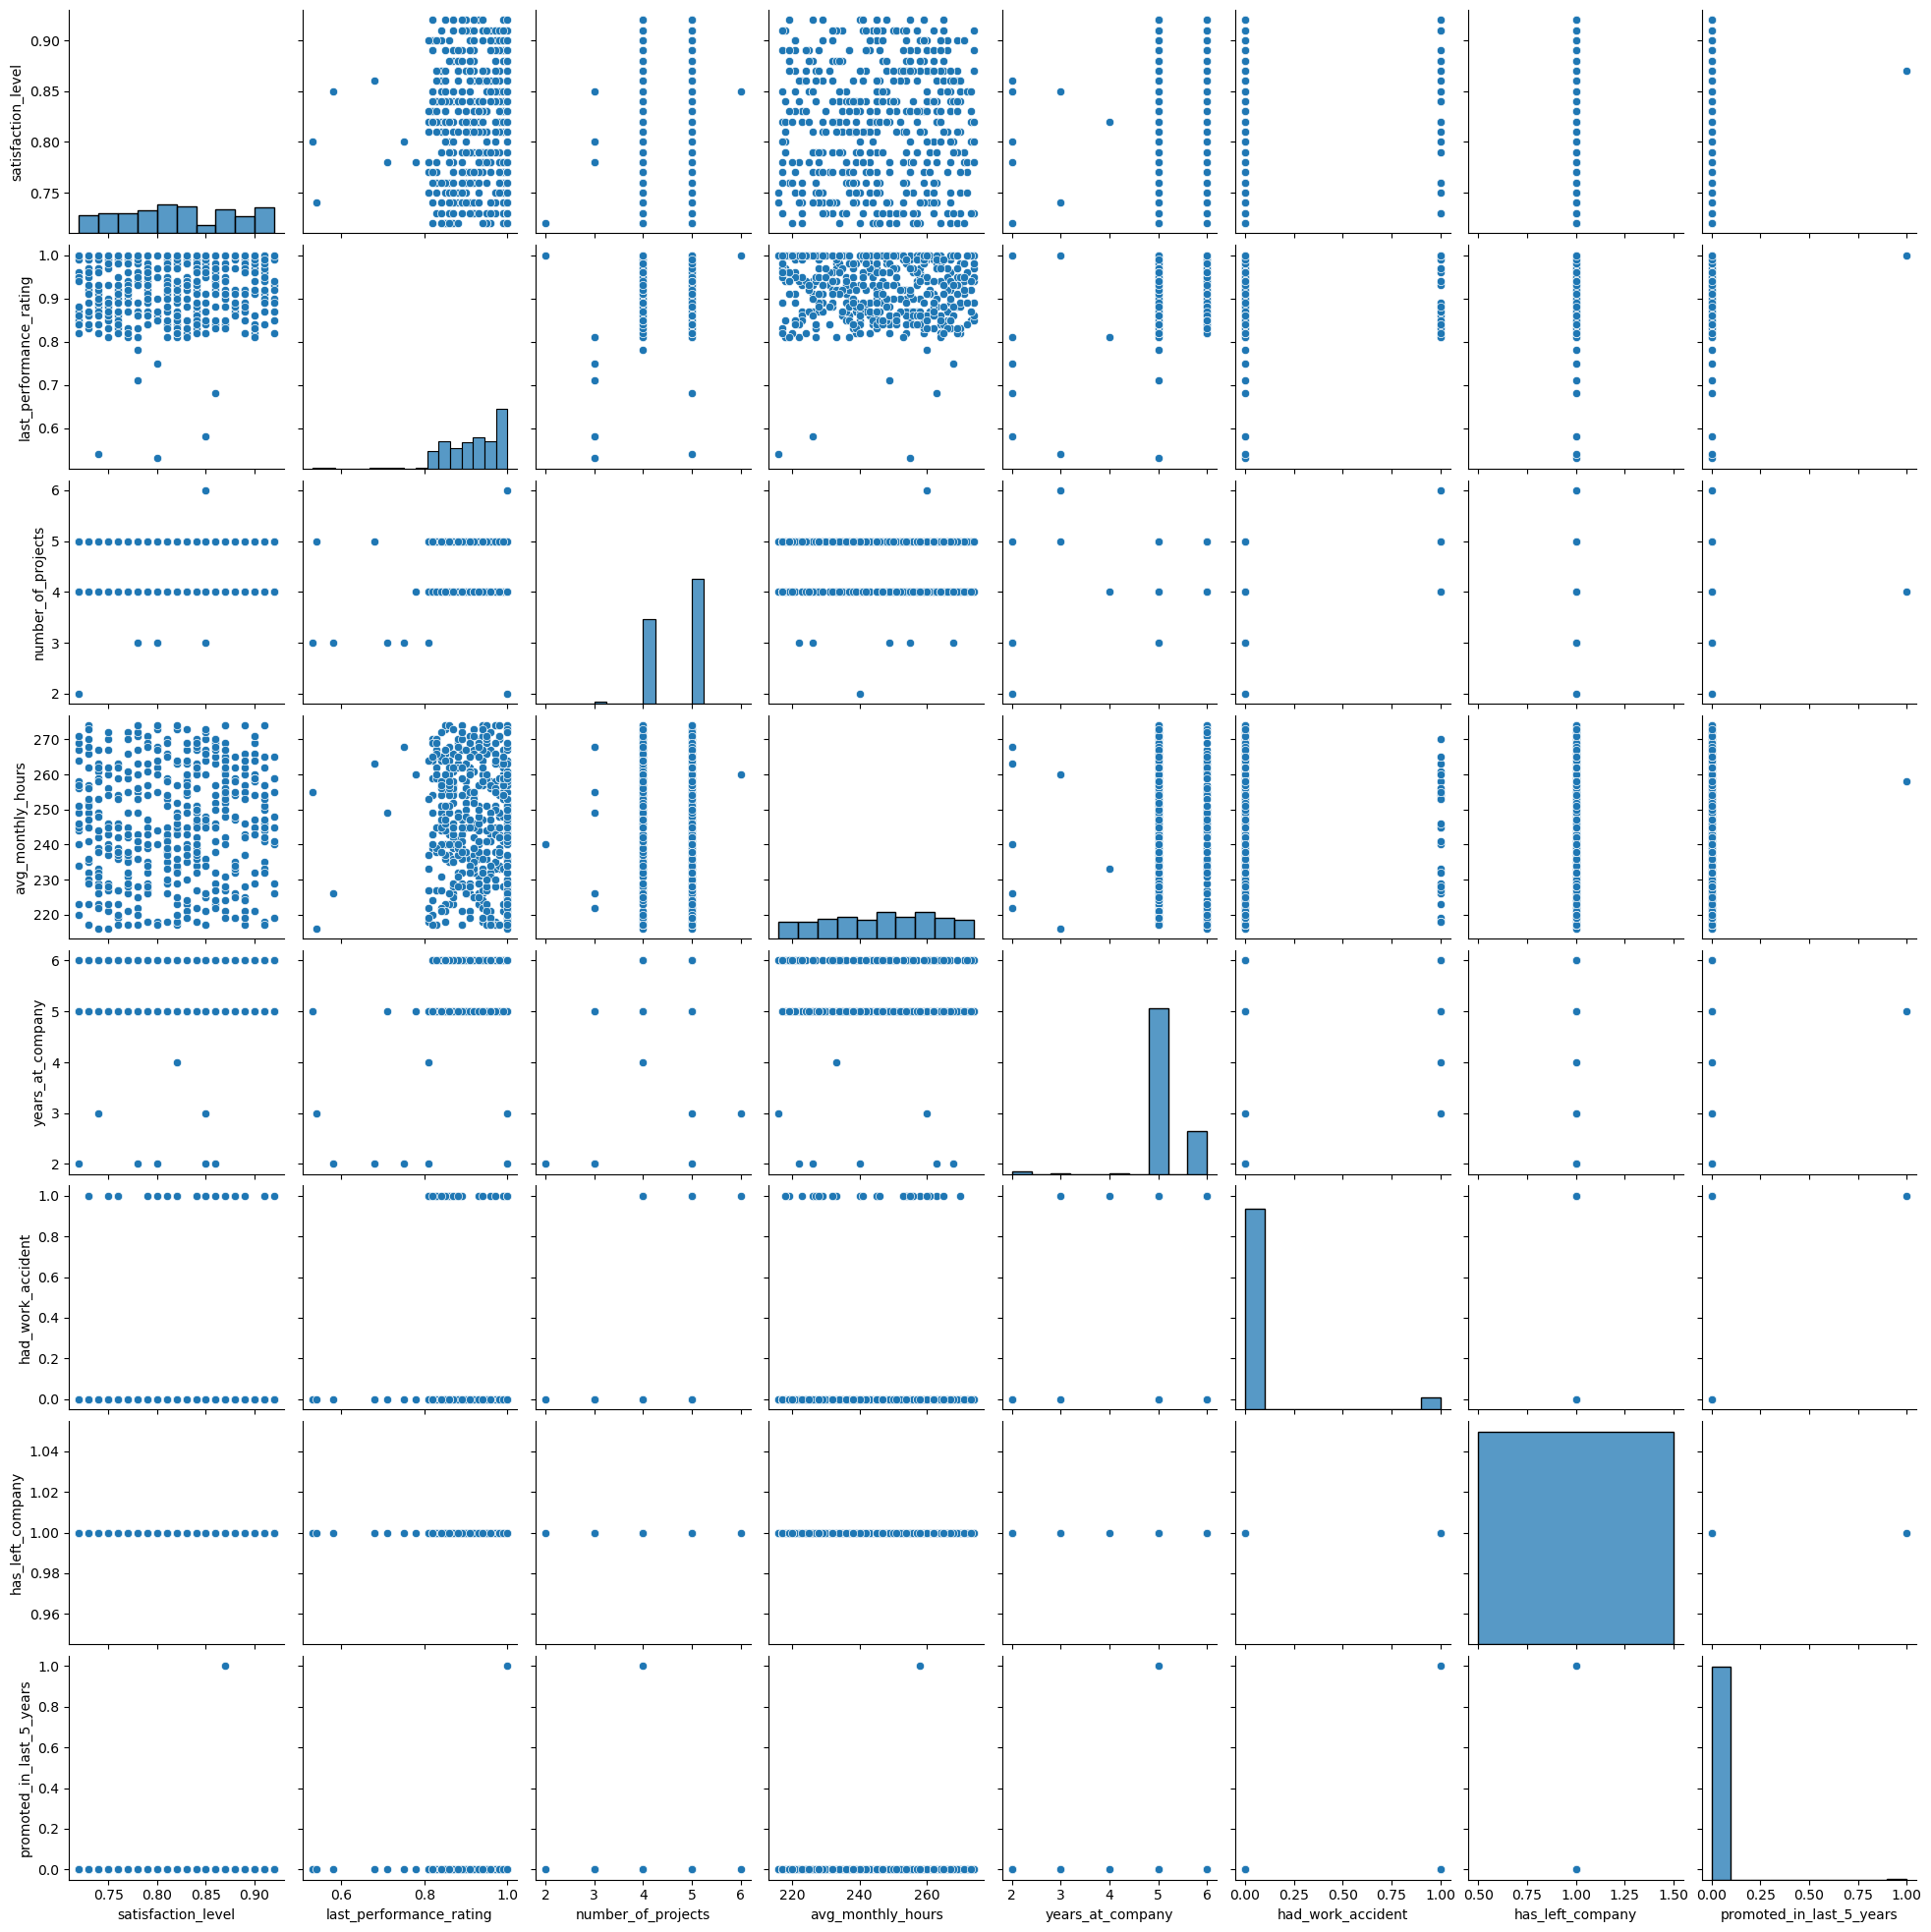

In [173]:
high_satisfaction_left = user_left[(user_left['satisfaction_level'] > 0.7)&(user_left['avg_monthly_hours'] > 215)&(user_left['avg_monthly_hours'] < 275)]
sns.pairplot(data=high_satisfaction_left)

Most employees spent 5 to 6 years and those employees were not promoted 

#### What is the outcome of employees who has higher salary with high projects and hours?

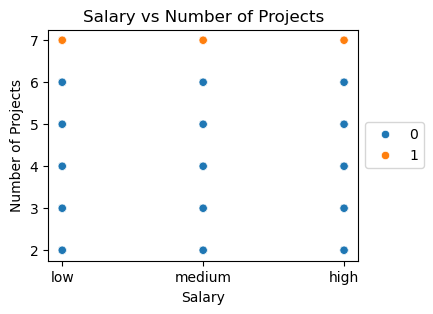

In [183]:
plt.figure(figsize=(4, 3))
sns.scatterplot(data=no_dupes, x='salary_level', y='number_of_projects', hue='has_left_company')
# Put a legend to the right of the current axis
plt.title('Salary vs Number of Projects')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Number of Projects')
plt.xlabel('Salary')
plt.show()

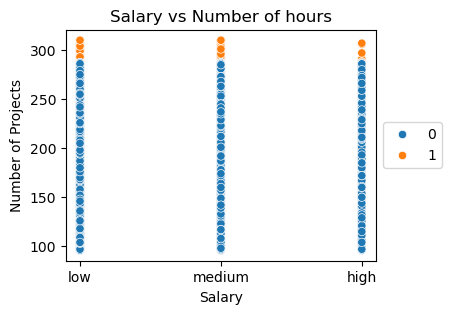

In [185]:
plt.figure(figsize=(4, 3))
sns.scatterplot(data=no_dupes, x='salary_level', y='avg_monthly_hours', hue='has_left_company')
# Put a legend to the right of the current axis
plt.title('Salary vs Number of hours')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Number of Projects')
plt.xlabel('Salary')
plt.show()

There is not significat difference between high salary and employees who left company

#### Feature Engnieering 

In [194]:
# Create a binary column to identify long-term employees (more than 4 years) without a promotion
no_dupes['long_term_no_promotion'] = no_dupes.apply(lambda row: 1 if (row['promoted_in_last_5_years'] == 0) & (row['years_at_company'] > 4) else 0, axis=1)

# Preview the updated dataframe
no_dupes.head()

satisfaction_level  last_performance_rating  number_of_projects  \
0                0.38                     0.53                   2   
1                0.80                     0.86                   5   
2                0.11                     0.88                   7   
3                0.72                     0.87                   5   
4                0.37                     0.52                   2   

   avg_monthly_hours  years_at_company  had_work_accident  has_left_company  \
0                157                 3                  0                 1   
1                262                 6                  0                 1   
2                272                 4                  0                 1   
3                223                 5                  0                 1   
4                159                 3                  0                 1   

   promoted_in_last_5_years department salary_level  long_term_no_promotion  
0                         0      sales          low                       0  
1                         0      sales       medium                       1  
2                         0      sales       medium                       0  
3                         0      sales          low                       1  
4                         0      sales          low                       0

#### Analysis of employees who were not statisfied but worked high hours and left company 

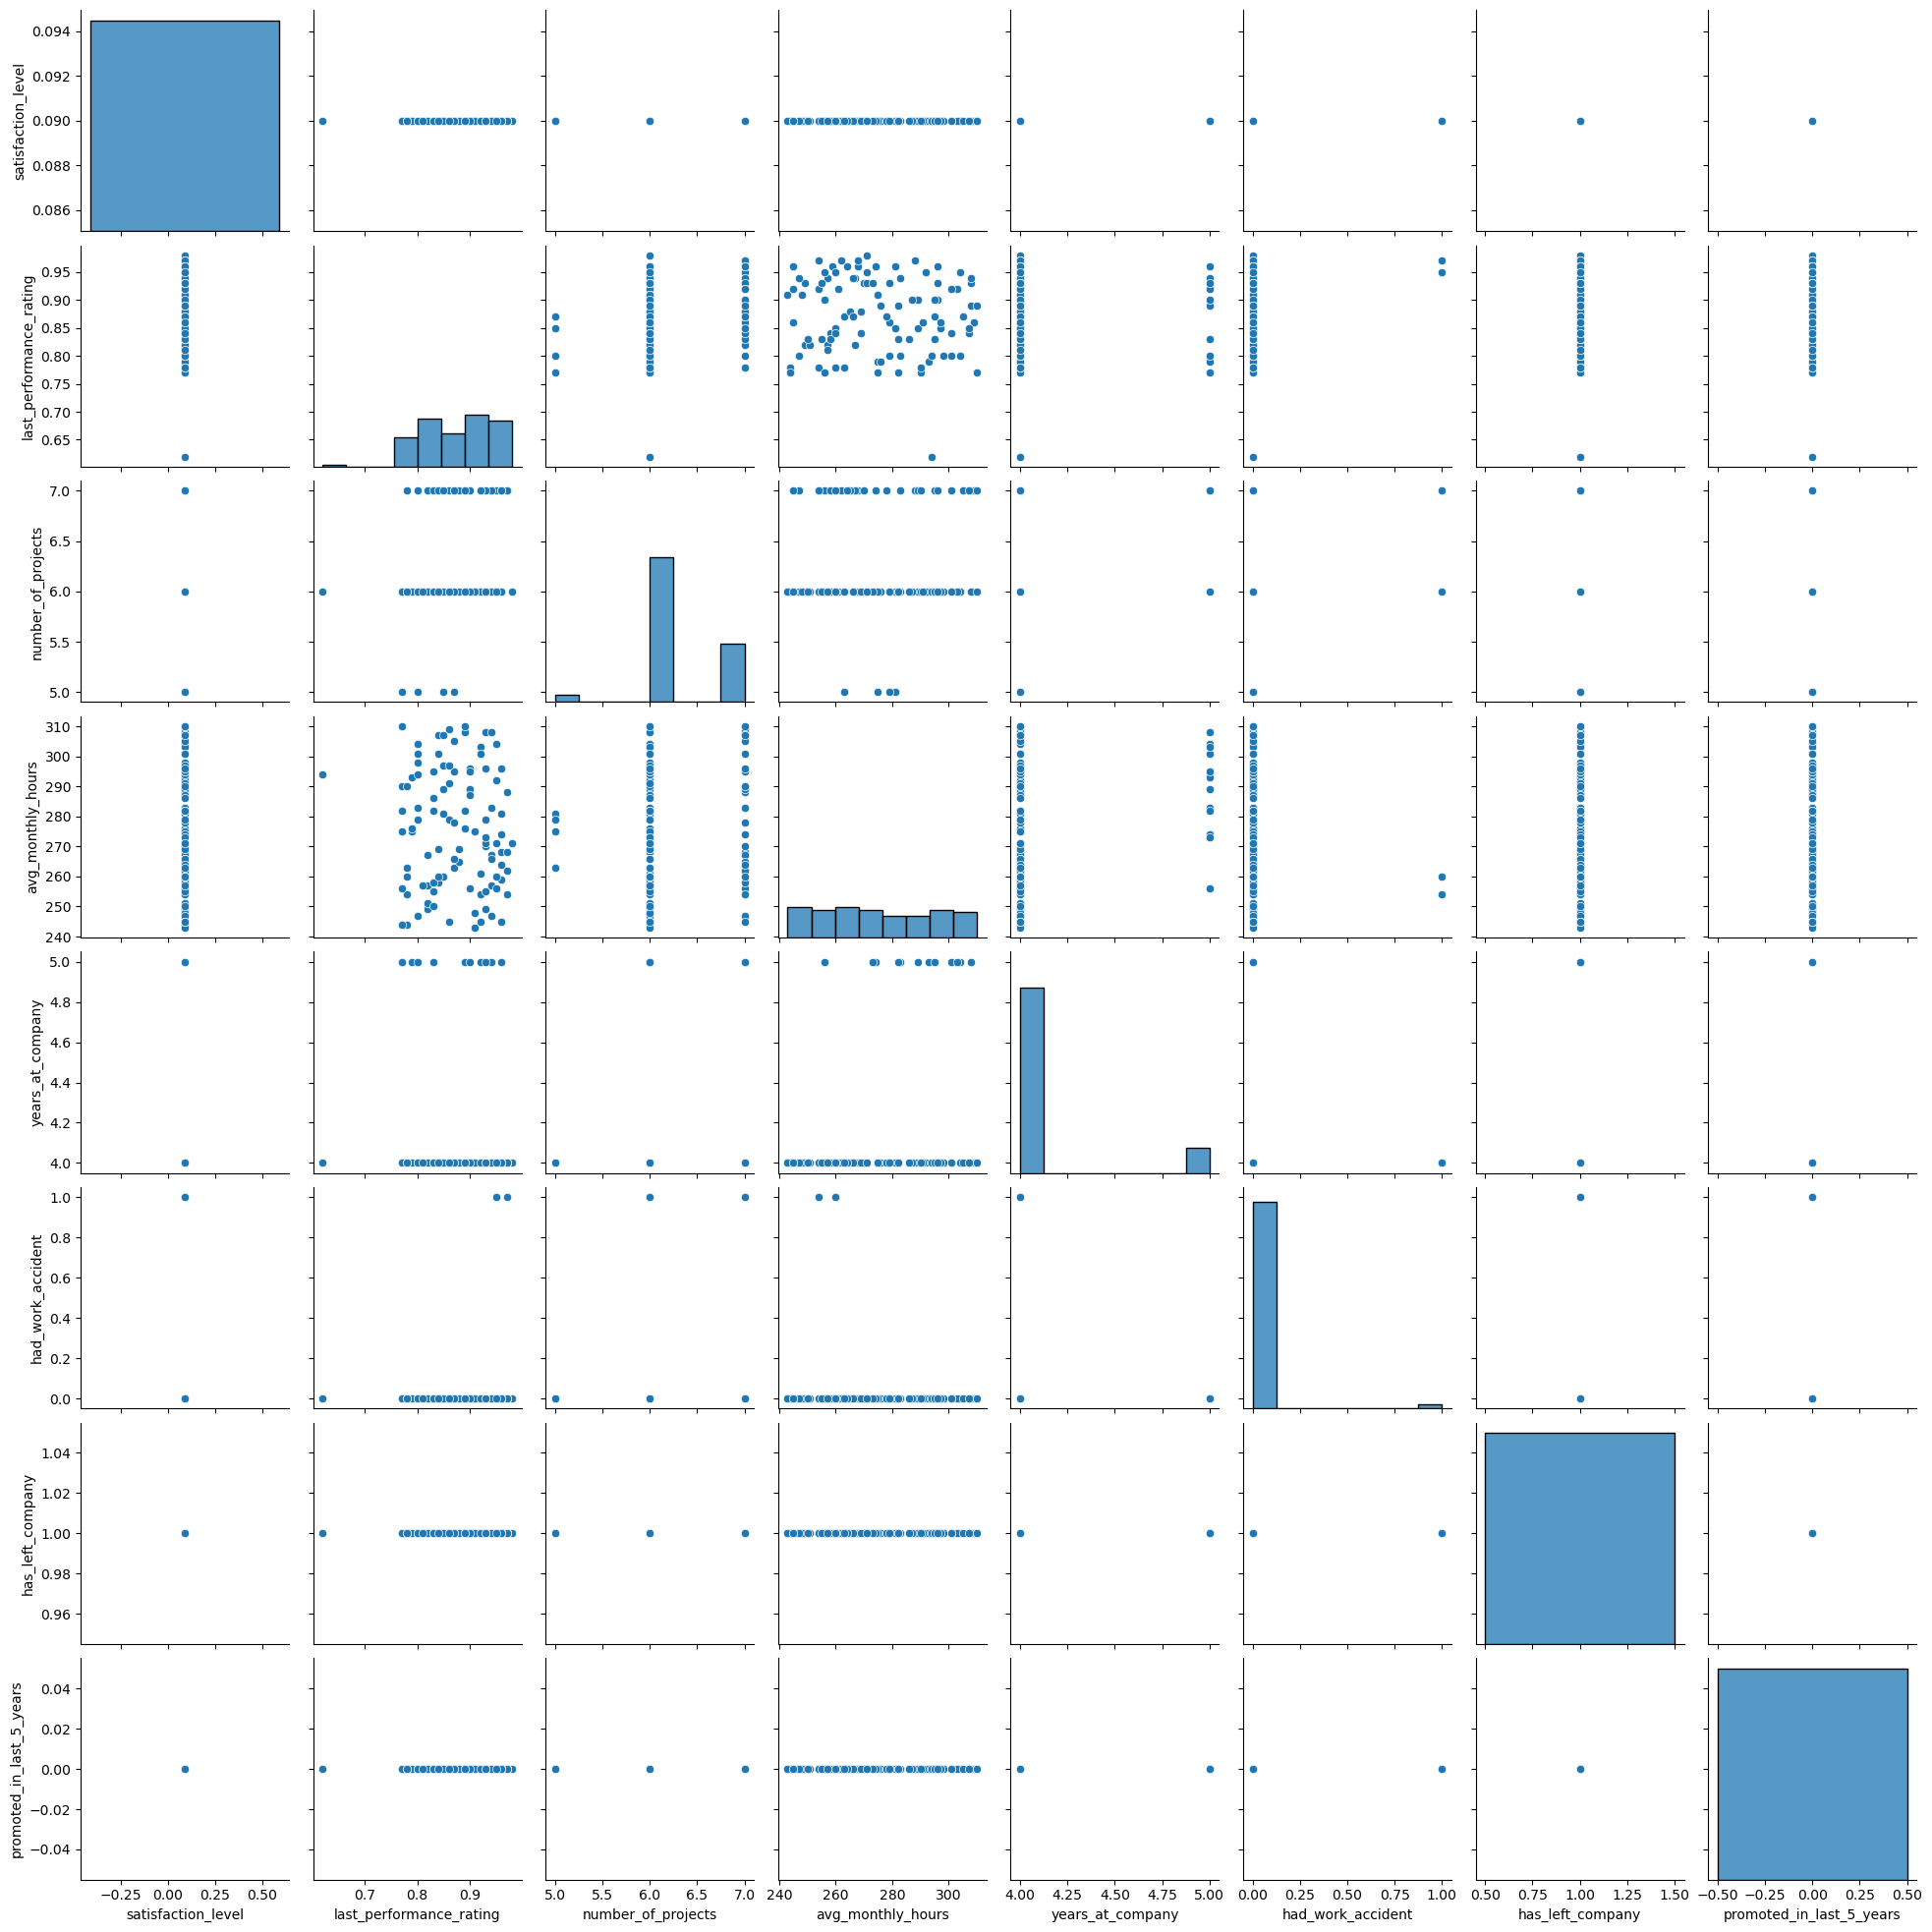

In [201]:
low_satisfaction_left = user_left[(user_left['satisfaction_level'] < 0.1)&(user_left['avg_monthly_hours'] > 240)]
sns.pairplot(data=low_satisfaction_left)

* High Evaluation Scores: They have consistently received high performance evaluations.
* Low Satisfaction Scores: Despite their strong performance, they report low job satisfaction.
* Tenure: They have typically been with the company for 4 or 5 years.
* Lack of Promotion: Notably, they have not received a promotion during their tenure.
* This unique combination of characteristics suggests that these employees may be feeling undervalued or stagnant in their careers, leading to their low job satisfaction

#### Feature Engineering 

#### composite feature that combines the relationship between number of project, average hours, satisfaction, and last evaluation

In [210]:
no_dupes['over_worked_high_performer'] = no_dupes['number_of_projects'] * no_dupes['avg_monthly_hours'] * no_dupes['last_performance_rating'] / no_dupes['satisfaction_level']
no_dupes.head()

satisfaction_level  last_performance_rating  number_of_projects  \
0                0.38                     0.53                   2   
1                0.80                     0.86                   5   
2                0.11                     0.88                   7   
3                0.72                     0.87                   5   
4                0.37                     0.52                   2   

   avg_monthly_hours  years_at_company  had_work_accident  has_left_company  \
0                157                 3                  0                 1   
1                262                 6                  0                 1   
2                272                 4                  0                 1   
3                223                 5                  0                 1   
4                159                 3                  0                 1   

   promoted_in_last_5_years department salary_level  long_term_no_promotion  \
0                         0      sales          low                       0   
1                         0      sales       medium                       1   
2                         0      sales       medium                       0   
3                         0      sales          low                       1   
4                         0      sales          low                       0   

   over_worked_high_performer  
0                  437.947368  
1                 1408.250000  
2                15232.000000  
3                 1347.291667  
4                  446.918919

#### visualize the relationship between the left variable (representing employee left) and the over_worked_high_performer variable

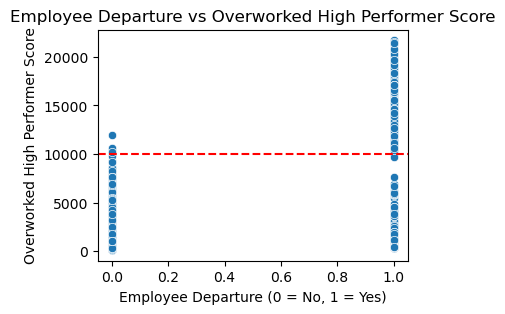

In [221]:
# Create a figure with a specified size
plt.figure(figsize=(4, 3))

# Generate a scatter plot using seaborn to visualize the relationship
# between employee departure (left) and overworked high performers
sns.scatterplot(data=no_dupes, x='has_left_company', y='over_worked_high_performer')

# Add a horizontal line to indicate the threshold (score > 10000)
plt.axhline(y=10000, color='r', linestyle='--', label='Likely to Leave')

# Add a title to the plot
plt.title('Employee Departure vs Overworked High Performer Score')

# Label the x-axis
plt.xlabel('Employee Departure (0 = No, 1 = Yes)')

# Label the y-axis
plt.ylabel('Overworked High Performer Score')

# Display the plot
plt.show()

A score exceeding 10000 appears to be a critical threshold, beyond which overworked high performers are highly likely to leave the company.

##### Employee Departure Patterns: Identifying Key Factors and Profiles

- Based on the analysis, several key factors contribute to an employee's likelihood of leaving the company. These include:
    - Workload: Employees with an excessive workload, typically exceeding 6 projects, are more likely to depart.
    - Work Hours: Those working an average of 275 hours or more per month tend to leave the company.
    - Job Satisfaction: Employees with a satisfaction level of 0.1 or lower are at a higher risk of departure.

##### Three distinct profiles of employees who tend to leave the company have been identified:

- Unfulfilled High Achievers: High-satisfaction employees who are mid-level performers often leave due to a lack of career progression, typically after 5 years of service without a promotion.
- 
Underutilized and Unhappy: Mid-satisfaction employees who are underperformers tend to have fewer projects, work below-average hours, and have a tenure of 3 years or less
- 
Overworked and Undervalued: Low-satisfaction employees who are high performers typically have a heavy workload, work long hours, and have been with the company for 4-5 years without receiving a promotion.

## Preprocessing Data

In [237]:
#Splitting Data into Features (X) and Target Variable (y)
X = no_dupes.drop(columns=['has_left_company'])
y = no_dupes['has_left_company']

In [241]:
# create dummy variables
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [243]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   satisfaction_level          11991 non-null  float64
 1   last_performance_rating     11991 non-null  float64
 2   number_of_projects          11991 non-null  int64  
 3   avg_monthly_hours           11991 non-null  int64  
 4   years_at_company            11991 non-null  int64  
 5   had_work_accident           11991 non-null  int64  
 6   promoted_in_last_5_years    11991 non-null  int64  
 7   long_term_no_promotion      11991 non-null  int64  
 8   over_worked_high_performer  11991 non-null  float64
 9   salary_level_low            11991 non-null  bool   
 10  salary_level_medium         11991 non-null  bool   
 11  department_RandD            11991 non-null  bool   
 12  department_accounting       11991 non-null  bool   
 13  department_hr               11991 no

In [245]:
# split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [247]:
X_train.shape

(8393, 20)

In [249]:
y_train.shape

(8393,)

## Modeling

This is a binary classification task. The relationship between the features and the target is not a linear relationship.

#### Random Forest Default with all features

In [252]:
# instantiate the Random Forest Model
rf_clf = RandomForestClassifier()


scores = cross_validate(rf_clf, 
                        X_train, 
                        y_train, 
                        cv=5, 
                        scoring=('f1', 'roc_auc', 'precision', 'recall'), 
                        return_train_score=True)

print('Random Forest Default Hyperparameters Results\n')
print('CV Test Results:')
print('\tF1 Score:', round(np.mean(scores['test_f1']), 3))
print('\tROC-AUC Score:', round(np.mean(scores['test_roc_auc']), 3))
print('\tPrecision Score:', round(np.mean(scores['test_precision']), 3))
print('\tRecall Score:', round(np.mean(scores['test_recall']), 3))



Random Forest Default Hyperparameters Results

CV Test Results:
	F1 Score: 0.943
	ROC-AUC Score: 0.981
	Precision Score: 0.984
	Recall Score: 0.906


In [254]:
# fit the default model on the training data
rf_clf.fit(X_train, y_train)

# test the best model on the test data
y_preds = rf_clf.predict(X_test)

# calculate f1
recall = recall_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
f1 = 2 * (recall * precision) / (recall + precision) 

# view the evaluation metrics
print('Default Random Forest Model')
print('\nTest Set Results:')
print('F1:', round(f1, 3))
print('ROC-AUC:', round(roc_auc_score(y_test, y_preds), 3))
print('Precision:', round(precision, 3))
print('Recall:', round(recall, 3))

Default Random Forest Model

Test Set Results:
F1: 0.955
ROC-AUC: 0.962
Precision: 0.986
Recall: 0.926


#### XGBoost Default with all Features

In [259]:
# instantiate the XGBoost Model
xgb_clf = XGBClassifier()


scores = cross_validate(xgb_clf, 
                        X_train, 
                        y_train, 
                        cv=5, 
                        scoring=('f1', 'roc_auc', 'precision', 'recall'), 
                        return_train_score=True)

print('XGBoost Default Hyperparameters Results\n')
print('CV Test Results:')
print('\tF1 Score:', round(np.mean(scores['test_f1']), 3))
print('\tROC-AUC Score:', round(np.mean(scores['test_roc_auc']), 3))
print('\tPrecision Score:', round(np.mean(scores['test_precision']), 3))
print('\tRecall Score:', round(np.mean(scores['test_recall']), 3))

XGBoost Default Hyperparameters Results

CV Test Results:
	F1 Score: 0.943
	ROC-AUC Score: 0.982
	Precision Score: 0.97
	Recall Score: 0.918


In [261]:
# fit the default model on the training data
xgb_clf.fit(X_train, y_train)

# test the best model on the test data
y_preds = xgb_clf.predict(X_test)

# calculate f1
recall = recall_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
f1 = 2 * (recall * precision) / (recall + precision) 

# view the evaluation metrics
print('Default XGBoost Model')
print('\nTest Set Results:')
print('F1:', round(f1, 3))
print('ROC-AUC:', round(roc_auc_score(y_test, y_preds), 3))
print('Precision:', round(precision, 3))
print('Recall:', round(recall, 3))

Default XGBoost Model

Test Set Results:
F1: 0.947
ROC-AUC: 0.96
Precision: 0.968
Recall: 0.926


#### Random Forest Hyperparameter Tuning 

In [264]:
# split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

# save the test sets for the final model
final_X_test = X_test.copy()
final_y_test = y_test.copy()

# view the shapes of the data
X_train.shape, X_test.shape

((8993, 20), (2998, 20))

In [266]:
# create the hyperparameters search space
cv_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(120, 800),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199),
    # randomly sample numbers from 5 to 30
    'max_depth':randint(5,30),
    # categoricaly choose between balanced and imbalanced
    'class_weight':['balanced', None]
    }


# define the scoring params
scoring = ['f1', 'precision', 'recall', 'roc_auc']

split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [268]:
# create the Random Search CV
rf_cv = RandomizedSearchCV(rf_clf, cv_params, n_iter=50, scoring=scoring, refit='f1', n_jobs=-1, cv=custom_split, random_state=42)

In [270]:
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ..., -1, -1])),
                   estimator=RandomForestClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CDE13FF8C0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CDD718E390>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CDD78D1DF0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CDD07C3980>},
                   random_state=42, refit='f1',
                   scoring=['f1', 'precision', 'recall', 'roc_auc'])

In [272]:
rf_cv.best_params_

{'class_weight': 'balanced',
 'max_depth': 29,
 'max_features': 0.3086069575737274,
 'min_samples_split': 0.010103555022067848,
 'n_estimators': 378}

In [274]:
rf_f1 = rf_cv.cv_results_['mean_test_f1'][rf_cv.best_index_]
rf_roc_auc = rf_cv.cv_results_['mean_test_roc_auc'][rf_cv.best_index_]
rf_prec = rf_cv.cv_results_['mean_test_precision'][rf_cv.best_index_]
rf_rec = rf_cv.cv_results_['mean_test_recall'][rf_cv.best_index_]


print('Random Forest Tuned Hyperparameters Results\n')
print('CV Results:')
print('\tF1 Score:', round(rf_f1, 3))
print('\tROC-AUC Score:', round(rf_roc_auc, 3))
print('\tPrecision Score:', round(rf_prec, 3))
print('\tRecall Score:', round(rf_rec, 3))

Random Forest Tuned Hyperparameters Results

CV Results:
	F1 Score: 0.953
	ROC-AUC Score: 0.984
	Precision Score: 0.988
	Recall Score: 0.92


In [276]:
# test the best model on the test data
rf_best = rf_cv.best_estimator_

rf_best.fit(X_train, y_train)

y_preds = rf_best.predict(X_test)

# calculate f1
recall = recall_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
f1 = 2 * (recall * precision) / (recall + precision) 

# view the evaluation metrics
print('Best Hyperparameter Tuned Random Forest Model')
print('\nTest Results:')
print('F1:', round(f1, 3))
print('ROC-AUC:', round(roc_auc_score(y_test, y_preds), 3))
print('Precision:', round(precision, 3))
print('Recall:', round(recall, 3))


Best Hyperparameter Tuned Random Forest Model

Test Results:
F1: 0.955
ROC-AUC: 0.962
Precision: 0.987
Recall: 0.926


#### XGBoost Hyperparameter Tuning

In [280]:
# create the hyperparameters search space
cv_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(120, 800),
    # randomly sample from 0.01 to 0.1 learning rate
    'eta': uniform(0.01, 0.1),
    # randomly sample from 3 to 25 for max depth
    'max_depth': randint(3, 25),
    # randomly sample from 1 to 7 for min child weight
    'min_child_weight':randint(1, 7),
    # randomly sample from 0.6 to 1.0 for subsample
    'subsample':uniform(0.6, 1.0),
    # randomly choose weight for positive class between 1 and 4
    'scale_pos_weight':randint(1, 4)
    }


# define the scoring params
scoring = ['f1', 'precision', 'recall', 'roc_auc']

split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [282]:
xgb_cv = RandomizedSearchCV(xgb_clf, cv_params, n_iter=50, scoring=scoring, refit='f1', n_jobs=-1, cv=custom_split, random_state=42)

In [284]:
xgb_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ..., -1, -1])),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_typ...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CDD70FC440>,
                                        'scale_pos_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CDE13FD310>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CDE1476930>},
                   random_state=42, refit='f1',
                   scoring=['f1', 'precision', 'recall', 'roc_auc'])

In [286]:
xgb_f1 = xgb_cv.cv_results_['mean_test_f1'][xgb_cv.best_index_]
xgb_roc_auc = xgb_cv.cv_results_['mean_test_roc_auc'][xgb_cv.best_index_]
xgb_prec = xgb_cv.cv_results_['mean_test_precision'][xgb_cv.best_index_]
xgb_rec = xgb_cv.cv_results_['mean_test_recall'][xgb_cv.best_index_]


print('XGBoost Tuned Hyperparameters Results\n')
print('CV Results:')
print('\tF1 Score:', round(xgb_f1, 3))
print('\tROC-AUC Score:', round(xgb_roc_auc, 3))
print('\tPrecision Score:', round(xgb_prec, 3))
print('\tRecall Score:', round(xgb_rec, 3))

XGBoost Tuned Hyperparameters Results

CV Results:
	F1 Score: 0.958
	ROC-AUC Score: 0.986
	Precision Score: 0.991
	Recall Score: 0.928


In [288]:
xgb_cv.best_params_

{'eta': 0.011326496115986653,
 'max_depth': 16,
 'min_child_weight': 2,
 'n_estimators': 465,
 'scale_pos_weight': 1,
 'subsample': 0.830893825622149}

In [290]:
# test the best model on the test data
xgb_best = xgb_cv.best_estimator_

xgb_best.fit(X_train, y_train)

y_preds = xgb_best.predict(X_test)

# calculate f1
recall = recall_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
f1 = 2 * (recall * precision) / (recall + precision) 

# view the evaluation metrics
print('Best Hyperparameter XGBoost Model')
print('\nTest Results:')
print('F1:', round(f1, 3))
print('ROC-AUC:', round(roc_auc_score(y_test, y_preds), 3))
print('Precision:', round(precision, 3))
print('Recall:', round(recall, 3))

Best Hyperparameter XGBoost Model

Test Results:
F1: 0.953
ROC-AUC: 0.961
Precision: 0.983
Recall: 0.926


#### Import Feature Selection

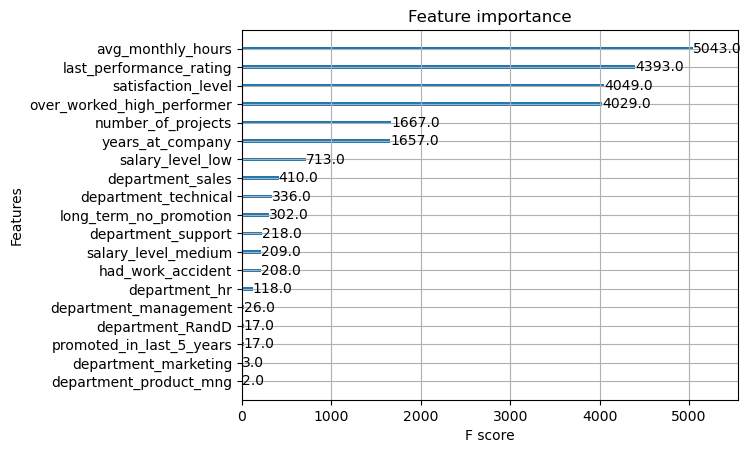

In [293]:
plot_importance(xgb_best)
plt.show()

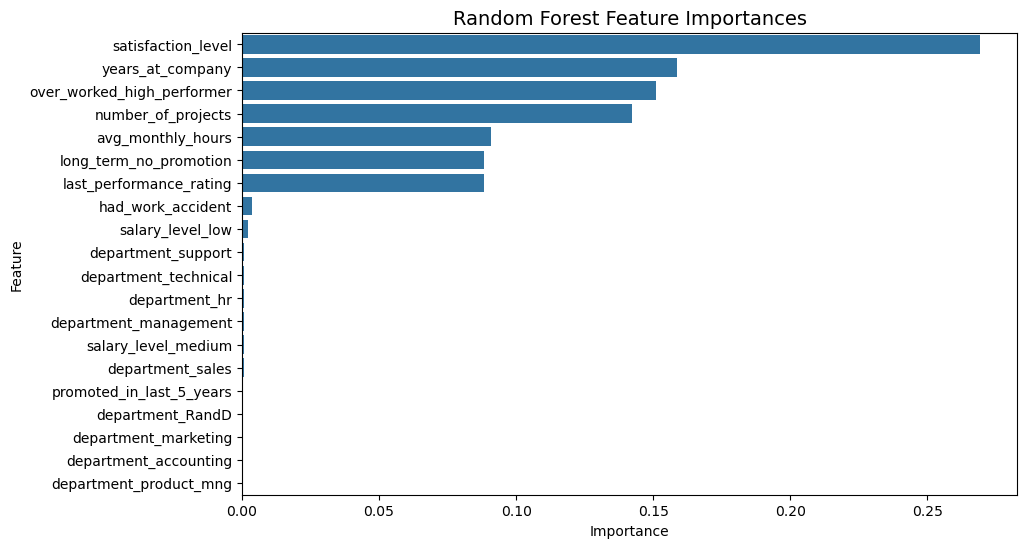

In [295]:
importances = rf_best.feature_importances_
feature_names = X_train.columns
feat_imps = {}
for i, name in enumerate(feature_names):
    feat_imps[name] = importances[i]
    
feat_imps_df = pd.DataFrame([feat_imps]).T.reset_index()
feat_imps_df.columns = ['feature', 'importance']
feat_imps_df = feat_imps_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imps_df, x='importance', y='feature')
plt.title('Random Forest Feature Importances', fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Based on the extractions of features we can remove department and promoted_in_last_5_years.

#### Modeling with Reduced Feature Set using Random Forest

In [305]:
# drop all department columns and the promotion_last_5years
drop_cols = [col for col in X.columns if 'department' in col] + ['promoted_in_last_5_years']
X = X.drop(columns=drop_cols)

# sanity check that the columns were dropped
assert 'promotion_last_5years' not in X.columns
assert len([col for col in X.columns if 'department' in col]) == 0

# split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

In [307]:
# create the hyperparameters search space
cv_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(120, 800),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    'max_features': truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    'min_samples_split': uniform(0.01, 0.199),
    # randomly sample numbers from 5 to 30
    'max_depth':randint(5,30),
    # categoricaly choose between balanced and imbalanced
    'class_weight':['balanced', None]
    }


# define the scoring params
scoring = ['f1', 'precision', 'recall', 'roc_auc']

split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [309]:
rf_drop_cv = RandomizedSearchCV(rf_clf, cv_params, n_iter=50, scoring=scoring, refit='f1', n_jobs=-1, cv=custom_split, random_state=42)

In [311]:
rf_drop_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ..., -1, -1])),
                   estimator=RandomForestClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CDE175D8B0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CDD6D824B0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CDD6D80890>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CDD6E14800>},
                   random_state=42, refit='f1',
                   scoring=['f1', 'precision', 'recall', 'roc_auc'])

In [313]:
rf_f1 = rf_drop_cv.cv_results_['mean_test_f1'][rf_drop_cv.best_index_]
rf_roc_auc = rf_drop_cv.cv_results_['mean_test_roc_auc'][rf_drop_cv.best_index_]
rf_prec = rf_drop_cv.cv_results_['mean_test_precision'][rf_drop_cv.best_index_]
rf_rec = rf_drop_cv.cv_results_['mean_test_recall'][rf_drop_cv.best_index_]


print('Random Forest Dropped Feats Tuned Hyperparameters Results\n')
print('CV Results:')
print('\tF1 Score:', round(rf_f1, 3))
print('\tROC-AUC Score:', round(rf_roc_auc, 3))
print('\tPrecision Score:', round(rf_prec, 3))
print('\tRecall Score:', round(rf_rec, 3))

Random Forest Dropped Feats Tuned Hyperparameters Results

CV Results:
	F1 Score: 0.953
	ROC-AUC Score: 0.984
	Precision Score: 0.988
	Recall Score: 0.92


In [315]:
rf_drop_cv.best_params_

{'class_weight': 'balanced',
 'max_depth': 29,
 'max_features': 0.3086069575737274,
 'min_samples_split': 0.010103555022067848,
 'n_estimators': 378}

In [317]:
# test the best model on the test data
rf_drop_best = rf_drop_cv.best_estimator_

rf_drop_best.fit(X_train, y_train)

y_preds = rf_drop_best.predict(X_test)

# calculate f1
recall = recall_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
f1 = 2 * (recall * precision) / (recall + precision) 

# view the evaluation metrics
print('Best Hyperparameter Random Forest Model')
print('\nTest Results:')
print('F1:', round(f1, 3))
print('ROC-AUC:', round(roc_auc_score(y_test, y_preds), 3))
print('Precision:', round(precision, 3))
print('Recall:', round(recall, 3))

Best Hyperparameter Random Forest Model

Test Results:
F1: 0.958
ROC-AUC: 0.963
Precision: 0.989
Recall: 0.928


#### XGBoost with these two features removed

In [322]:
# create the hyperparameters search space
cv_params = {
    # randomly sample numbers from 4 to 204 estimators
    'n_estimators': randint(120, 800),
    # randomly sample from 0.01 to 0.1 learning rate
    'eta': uniform(0.01, 0.1),
    # randomly sample from 3 to 25 for max depth
    'max_depth': randint(3, 25),
    # randomly sample from 1 to 7 for min child weight
    'min_child_weight':randint(1, 7),
    # randomly sample from 0.6 to 1.0 for subsample
    'subsample':uniform(0.6, 1.0),
    # randomly choose weight for positive class between 1 and 4
    'scale_pos_weight':randint(1, 4)
    }


# define the scoring params
scoring = ['f1', 'precision', 'recall', 'roc_auc']

split_index = [0 if x in X_val.index else -1 for x in X_train.index]
custom_split = PredefinedSplit(split_index)

In [324]:
xgb_drop_cv = RandomizedSearchCV(xgb_clf, cv_params, n_iter=50, scoring=scoring, refit='f1', n_jobs=-1, cv=custom_split, random_state=42)

In [326]:
xgb_drop_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=PredefinedSplit(test_fold=array([ 0, -1, ..., -1, -1])),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_typ...
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CDE1476720>,
                                        'scale_pos_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001CDE1775160>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001CDE1774F80>},
                   random_state=42, refit='f1',
                   scoring=['f1', 'precision', 'recall', 'roc_auc'])

In [328]:
xgb_f1 = xgb_drop_cv.cv_results_['mean_test_f1'][xgb_drop_cv.best_index_]
xgb_roc_auc = xgb_drop_cv.cv_results_['mean_test_roc_auc'][xgb_drop_cv.best_index_]
xgb_prec = xgb_drop_cv.cv_results_['mean_test_precision'][xgb_drop_cv.best_index_]
xgb_rec = xgb_drop_cv.cv_results_['mean_test_recall'][xgb_drop_cv.best_index_]


print('XGBoost Dropped Feats Tuned Hyperparameters Results\n')
print('CV Results:')
print('\tF1 Score:', round(xgb_f1, 3))
print('\tROC-AUC Score:', round(xgb_roc_auc, 3))
print('\tPrecision Score:', round(xgb_prec, 3))
print('\tRecall Score:', round(xgb_rec, 3))

XGBoost Dropped Feats Tuned Hyperparameters Results

CV Results:
	F1 Score: 0.957
	ROC-AUC Score: 0.987
	Precision Score: 0.989
	Recall Score: 0.928


In [330]:
xgb_drop_cv.best_params_

{'eta': 0.011326496115986653,
 'max_depth': 16,
 'min_child_weight': 2,
 'n_estimators': 465,
 'scale_pos_weight': 1,
 'subsample': 0.830893825622149}

In [332]:
# test the best model on the test data
xgb_drop_best = xgb_drop_cv.best_estimator_

xgb_drop_best.fit(X_train, y_train)

y_preds = xgb_drop_best.predict(X_test)

# calculate f1
recall = recall_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
f1 = 2 * (recall * precision) / (recall + precision) 

# view the evaluation metrics
print('Best Hyperparameter Random Forest Model')
print('\nTest Results:')
print('F1:', round(f1, 3))
print('ROC-AUC:', round(roc_auc_score(y_test, y_preds), 3))
print('Precision:', round(precision, 3))
print('Recall:', round(recall, 3))

Best Hyperparameter Random Forest Model

Test Results:
F1: 0.951
ROC-AUC: 0.961
Precision: 0.979
Recall: 0.926


## Summary

Best Model: XGBoost Tuned CV

XGBoost Tuned CV has the best F1 score and Recall

In [346]:
# save the xgboost tuned cv model
xgb_best.save_model("C:/Users/Casey/Documents/Projects/Shopping Habits/best_model.json")

### Visualizing incorrectly labeled Data

In [349]:
xgb_best.n_features_in_

20

In [351]:
print(classification_report(final_y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2500
           1       0.98      0.93      0.95       498

    accuracy                           0.98      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



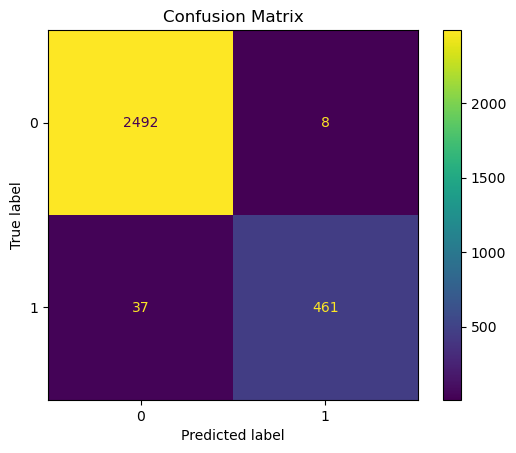

In [353]:
# Load model from file
best_model = XGBClassifier()
best_model.load_model('C:/Users/Casey/Documents/Projects/Shopping Habits/best_model.json')

# predict on the test data
y_preds = best_model.predict(final_X_test)

# view the confusion matrix
cm = confusion_matrix(final_y_test, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

There are 37 False Negatives in the confusion matrix.

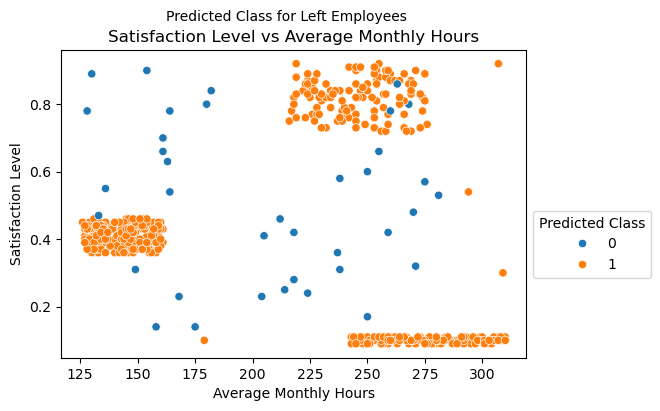

In [360]:
# create a scatter plot of the 'left' employees by satisfaction level and average monthly hours and color by predicted class
plt.figure(figsize=(6, 4))
final_X_test['left'] = final_y_test
final_X_test['predicted_class'] = y_preds
left_df = final_X_test[final_X_test['left'] == 1].copy()
sns.scatterplot(data=left_df, y='satisfaction_level', x='avg_monthly_hours', hue='predicted_class')
plt.suptitle('Predicted Class for Left Employees', fontsize=10)
plt.title('Satisfaction Level vs Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.legend(loc='upper left', bbox_to_anchor= (1.0, 0.5), title='Predicted Class')
plt.show()

The three False Negatives share the following characteristics:

- High Satisfaction: All three instances have high satisfaction levels.
- Medium Hours: They all have medium hours worked.

In [369]:
mid_df = left_df[(left_df['satisfaction_level'] > 0.7)&(left_df['avg_monthly_hours'] > 215)&(left_df['avg_monthly_hours'] < 275)]
mid_false_negs = mid_df[mid_df['predicted_class'] == 0]
mid_false_negs

satisfaction_level  last_performance_rating  number_of_projects  \
620                 0.80                     0.75                   3   
116                 0.86                     0.68                   5   
1450                0.78                     0.78                   4   

      avg_monthly_hours  years_at_company  had_work_accident  \
620                 268                 2                  0   
116                 263                 2                  0   
1450                260                 5                  0   

      promoted_in_last_5_years  long_term_no_promotion  \
620                          0                       0   
116                          0                       0   
1450                         0                       1   

      over_worked_high_performer  salary_level_low  ...  \
620                   753.750000             False  ...   
116                  1039.767442             False  ...   
1450                 1040.000000              True  ...   

      department_accounting  department_hr  department_management  \
620                   False          False                  False   
116                   False          False                  False   
1450                  False          False                  False   

      department_marketing  department_product_mng  department_sales  \
620                  False                   False              True   
116                  False                   False             False   
1450                 False                   False             False   

      department_support  department_technical  left  predicted_class  
620                False                 False     1                0  
116                False                  True     1                0  
1450               False                 False     1                0  

[3 rows x 22 columns]

In [373]:
# get the positive probability for the false negatives
fn_proba_positive = xgb_best.predict_proba(mid_false_negs.drop(columns=['left', 'predicted_class']))[:, 1]

In [377]:
mid_false_negs['pred_prob_pos'] = fn_proba_positive.round(3)
for i, val in mid_false_negs['pred_prob_pos'].items():
    print(f'User Index: {i}')
    print(f'Predicted Probability of Leaving: {round(val*100, 1)}%\n')

User Index: 620
Predicted Probability of Leaving: 0.5%

User Index: 116
Predicted Probability of Leaving: 0.3%

User Index: 1450
Predicted Probability of Leaving: 26.3%



In [381]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(xgb_best)

data_for_prediction = mid_false_negs.drop(columns=['left', 'predicted_class', 'pred_prob_pos'])

# start with the one with the highest probability of leaving
employee_620 = data_for_prediction.loc[620, :]
employee_116 = data_for_prediction.loc[116, :]

In [383]:
# start with the employee with the highest probability of leaving
data_for_prediction_array = employee_620.values.reshape(1, -1)

# Calculate Shap values 
shap_values = explainer.shap_values(data_for_prediction_array)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, employee_620)

In [385]:
# start with the employee with the highest probability of leaving
data_for_prediction_array = employee_116.values.reshape(1, -1)

# Calculate Shap values 
shap_values = explainer.shap_values(data_for_prediction_array)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, employee_116)

## Conclusion

"RetentionInsights" model has demonstrated exceptional performance in predicting employee churn. Given the significant cost of losing an employee due 
to false negatives (i.e., predicting they will stay when they actually leave), we opted for the highest Recall model.

The model's impressive performance metrics are as follows:

- Recall Score: 93%: The model accurately identifies a high proportion of employees who are likely to leave, minimizing the risk of false negatives.
- F1 Score: 95%: The model strikes a balance between precision and recall, ensuring that it is both accurate and comprehensive in its predictions.
These results indicate that the "RetentionInsights" model is well-calibrated and effective in identifying employees at risk of churn

### Business recommendations: 

#### 1. Low Satisfaction High Performer Group
Identify employees in this group who are likely to leave and offer them a promotion or a reduction in hours/projects, or a combination of both, 
to better align with their preferences. This will help to address their dissatisfaction and retain their valuable skills.

- 4-5 years with the company but not promotion
- Average Monthly Hours greater than 240
- 6-7 projects
- High Evaluation Scores
- Low Satisfaction Scores

#### 2. High Satisfaction Mid Performer Group
For employees in this group who are likely to leave, consider offering a promotion to recognize their value to the company. As mid-performers, 
they contribute significantly to the organization, and retaining them is crucial.

- 3 years with the company
- Average Monthly Hours less than 165
- 2-3 projects
- Low Evaluation Scores
- Mid Satisfaction Scores

#### 3. Mid Satisfaction Low Performer Group

For employees in this group who are likely to leave, consider reassigning some of the workload from the High Performer group to them. This may increase their job satisfaction, as they may be underutilized and bored with their current projects. Additionally, this will provide an opportunity for them to improve their evaluation scores with their manager. If they still choose to leave, the impact on the company will be minimized, as they are not currently providing high value.

- Greater than 5 years at the company
- No Promotion
- Average Monthly Hours between 215-275
- 3-5 Projects

By implementing these recommendations, HR and management can develop targeted retention strategies to reduce employee turnover, improve job satisfaction, and maintain a high-performing workforce.



### Future Recommendation:

Model Improvement Opportunities: "RetentionInsights"
1. Feature Selection and Engineering: Conducting more extensive feature selection and engineering may help to identify additional relevant patterns in 
the data, potentially leading to improved model performance.

2. Exploring Combined Features for Feature Interactions
Investigating the creation of combined features to capture complex interactions between variables may help to uncover additional patterns in the data, 
potentially leading to improved model performance.




### Next Steps:

By leveraging the SHAP values generated by the "RetentionInsights" model, we can gain a deeper understanding of the key factors driving an individual's
desire to leave the company. This insight enables HR and management to develop highly targeted and personalized retention strategies for each employee.

For instance, by analyzing the SHAP values for a specific employee, we can identify the primary driver of their dissatisfaction, whether it's related
to job satisfaction, workload, or other factors. This information can then be used to facilitate a constructive conversation with the employee, 
focusing on the specific areas that need improvement.